In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [6]:
nx.__version__

'3.0'

In [8]:
G = nx.Graph()



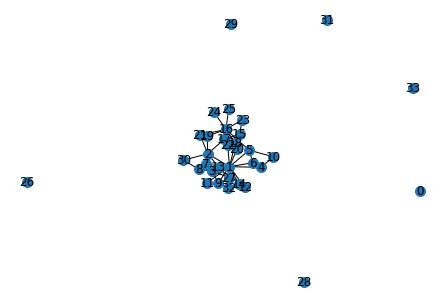

In [11]:
# Add nodes
G.add_nodes_from(range(34))

# Add edges
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), 
         (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), 
         (1, 32), (2, 3), (2, 7), (2, 13), (2, 17), (2, 19), (2, 21), 
         (2, 30), (3, 7), (3, 8), (3, 9), (3, 13), (3, 27), (4, 6), (4, 10), 
         (5, 6), (5, 10), (5, 16), (7, 8), (8, 30), (9, 32), (13, 27), (14, 32), 
         (15, 17), (15, 18), (15, 20), (15, 22), (15, 23), (16, 17), (16, 18), (16, 19), 
         (16, 21), (16, 22), (16, 23), (16, 24), (16, 25), (17, 18), (17, 20), (17, 22)]
G.add_edges_from(edges)

nx.draw(G, with_labels=True, node_size=100)
plt.show()

In [12]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
page_rank = nx.pagerank(G)

In [13]:
# Convert the lists in the dictionary to pandas Series
degree_centrality = pd.Series(degree_centrality)
betweenness_centrality = pd.Series(betweenness_centrality)
closeness_centrality = pd.Series(closeness_centrality)
eigenvector_centrality = pd.Series(eigenvector_centrality)
page_rank = pd.Series(page_rank)

# Create a dictionary to store the centrality measures for each node
centrality_measures = {
    'Name': [i for i in range(0, 34)],
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Eigenvector Centrality': eigenvector_centrality,
    'Page Rank': page_rank
}

# Convert the dictionary to a pandas dataframe
df = pd.DataFrame(centrality_measures)

# Set the index as the node name
df.set_index('Name', inplace=True)

# Display the table
print(df)


      Degree Centrality  Betweenness Centrality  Closeness Centrality  \
Name                                                                    
0              0.000000                0.000000              0.000000   
1              0.484848                0.376231              0.538803   
2              0.242424                0.116486              0.441818   
3              0.212121                0.037423              0.394481   
4              0.090909                0.016035              0.345170   
5              0.121212                0.065294              0.416810   
6              0.090909                0.002004              0.368182   
7              0.121212                0.001691              0.374422   
8              0.121212                0.013889              0.356305   
9              0.090909                0.001578              0.345170   
10             0.060606                0.002004              0.286895   
11             0.030303                0.000000    

In [14]:

# Add centrality measures as properties to each node
for node in G.nodes():
    G.nodes[node]['degree_centrality'] = degree_centrality[node]
    G.nodes[node]['betweenness_centrality'] = betweenness_centrality[node]
    G.nodes[node]['closeness_centrality'] = closeness_centrality[node]
    G.nodes[node]['eigenvector_centrality'] = eigenvector_centrality[node]
    G.nodes[node]['page_rank'] = page_rank[node]


In [15]:
import json

# Export graph to cytoscape json format
cyto_json = json.dumps(nx.readwrite.json_graph.cytoscape_data(G))

# Save json file
with open("cytoscape_graph.json", "w") as f:
    f.write(cyto_json)

In [16]:
print(cyto_json)

{"data": [], "directed": false, "multigraph": false, "elements": {"nodes": [{"data": {"degree_centrality": 0.0, "betweenness_centrality": 0.0, "closeness_centrality": 0.0, "eigenvector_centrality": 2.447449283287242e-24, "page_rank": 0.0051903114186851226, "id": "0", "value": 0, "name": "0"}}, {"data": {"degree_centrality": 0.48484848484848486, "betweenness_centrality": 0.3762310606060607, "closeness_centrality": 0.5388026607538803, "eigenvector_centrality": 0.5151983014949099, "page_rank": 0.13243692743011462, "id": "1", "value": 1, "name": "1"}}, {"data": {"degree_centrality": 0.24242424242424243, "betweenness_centrality": 0.1164862914862915, "closeness_centrality": 0.4418181818181819, "eigenvector_centrality": 0.3177466777830075, "page_rank": 0.06579157778647426, "id": "2", "value": 2, "name": "2"}}, {"data": {"degree_centrality": 0.21212121212121213, "betweenness_centrality": 0.037423340548340546, "closeness_centrality": 0.3944805194805195, "eigenvector_centrality": 0.3167837372864